In [3]:
import pandas as pd
import numpy as np
import warnings

In [5]:
data=pd.read_csv(r'sales.csv')
data.head()

,OrderID,OrderDate,Region,Salesperson,ProductName,Sales
0,1001,2023-01-01,East,Alice,Laptop,1200
1,1002,2023-01-16,West,Bob,Tablet,800
2,1003,2023-01-31,North,Charlie,Monitor,450
3,1004,2023-02-15,South,David,Printer,700
4,1005,2023-03-02,East,Eve,Laptop,1300


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OrderID      10 non-null     int64 
 1   OrderDate    10 non-null     object
 2   Region       10 non-null     object
 3   Salesperson  10 non-null     object
 4   ProductName  10 non-null     object
 5   Sales        10 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 612.0+ bytes


In [12]:
data.describe()

,OrderID,Sales
count,10.00000,10.0000
mean,1005.50000,808.0000
std,3.02765,305.4614
min,1001.00000,450.0000
25%,1003.25000,542.5000
50%,1005.50000,775.0000
75%,1007.75000,1030.0000
max,1010.00000,1300.0000


# Find Top Products by Sales

In [13]:
# Group by ProductName and sum Sales
top_products = data.groupby("ProductName")["Sales"].sum().reset_index()

# Sort by Sales in descending order
top_products = top_products.sort_values(by="Sales", ascending=False)

print(top_products)

  ProductName  Sales
0      Laptop   3600
3      Tablet   1620
2     Printer   1450
1     Monitor   1410


# Identify Monthly Sales Trends

In [14]:
data["OrderDate"] = pd.to_datetime(data["OrderDate"])  # Convert to datetime format
data["Month"] = data["OrderDate"].dt.strftime("%Y-%m")  # Extract Year-Month

monthly_trends = data.groupby("Month")["Sales"].sum().reset_index()

print(monthly_trends)


     Month  Sales
0  2023-01   2450
1  2023-02    700
2  2023-03   1770
3  2023-04   1570
4  2023-05   1590


# Analyze Regional Sales

In [15]:
regional_sales = data.groupby("Region")["Sales"].sum().reset_index()

print(regional_sales)


  Region  Sales
0   East   3600
1  North   1270
2  South   1450
3   West   1760


In [19]:
# Group by Region and Month
regional_monthly_sales = data.groupby(["Region", "Month"])["Sales"].sum().reset_index()
print(regional_monthly_sales)

  Region    Month  Sales
0   East  2023-01   1200
1   East  2023-03   1300
2   East  2023-05   1100
3  North  2023-01    450
4  North  2023-04    820
5  South  2023-02    700
6  South  2023-04    750
7   West  2023-01    800
8   West  2023-03    470
9   West  2023-05    490


# Bar plot

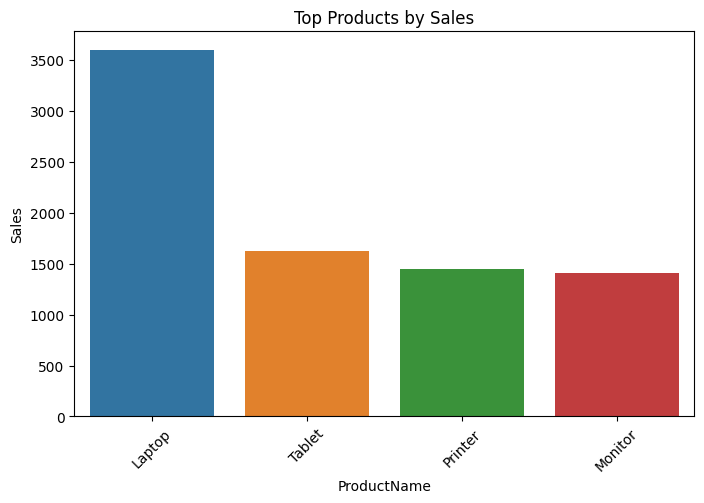

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for Top Products
plt.figure(figsize=(8,5))
sns.barplot(x="ProductName", y="Sales", data=top_products)
plt.title("Top Products by Sales")
plt.xticks(rotation=45)
plt.show()

Top Products

Laptops are the highest-selling product with a total sales value of ₹3600.

Tablets follow with ₹1620, 

while Printers and Monitors are slightly lower but still significant.

# Line chart

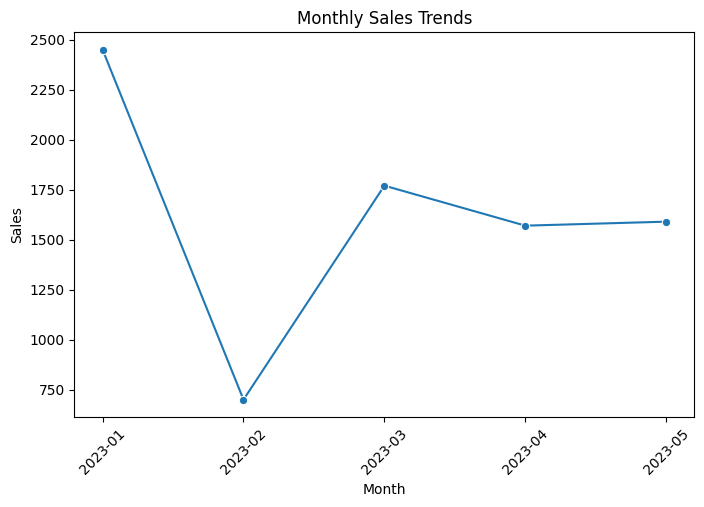

In [17]:
# Line plot for Monthly Sales Trends
plt.figure(figsize=(8,5))
sns.lineplot(x="Month", y="Sales", data=monthly_trends, marker="o")
plt.title("Monthly Sales Trends")
plt.xticks(rotation=45)
plt.show()

Monthly Sales Trends

The highest sales were recorded in January (₹2450), suggesting strong demand at the start of the year.

March (₹1770) and May (₹1590) also showed strong performance.

February had the lowest sales (₹700), indicating a possible dip in demand or external factors.

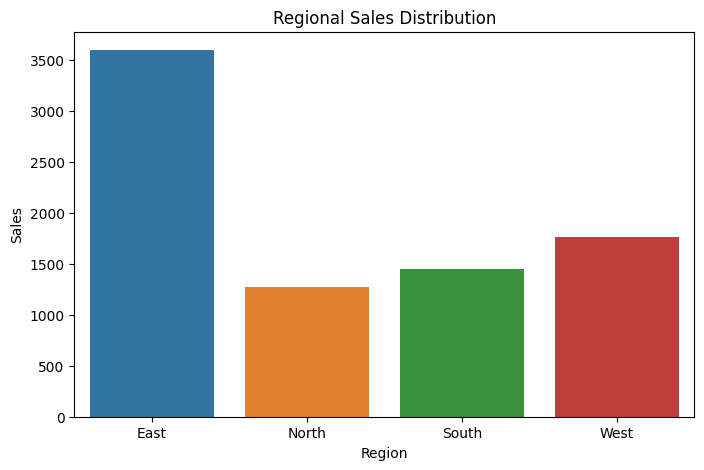

In [18]:
# Bar chart for Regional Sales
plt.figure(figsize=(8,5))
sns.barplot(x="Region", y="Sales", data=regional_sales)
plt.title("Regional Sales Distribution")
plt.show()

Regional Sales Insights

East region led with ₹3600 in sales, contributing the highest revenue.

West (₹1760) performed well, while South (₹1450) and North (₹1270) showed moderate sales.

# Conclusion

Laptops dominate product sales—indicating strong customer preference.

Sales peak in January and fluctuate through the months, which might suggest seasonal demand.

East region is the strongest market, suggesting more potential for growth in other regions.